# Creating a Model
In this exercise you'll create a machine learning model, per your choice, on the Election data. 
1. Read the data in the file ```ElectionData.csv```. 
2. Divide the set into train and test.
3. Detect outliers and decide what to do with them.
4. Scale the numeric features in a method of your choics.
5. Select the relevant features (you don't need more than 10, maybe less).
6. Convert the categorial feature to numeric feature using one-hot-encoding.
7. Train a model per your choice, use the field ```Vote``` as the target feature.
8. Extract confusion matrix over the test set and print it.
9. Check for specific errors in the confusion matrix that you can improve. 
10. When you are satisfied with the results, read the data in the file ```ElectionDataTest.csv```, and predict the vote for the 2,000 people in the Test data. 
11. Send the predicted data for evaluation

In [1]:
import pandas as pd
import numpy as nu
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
Election_Data = pd.read_csv('ElectionsData.csv')

In [3]:
Election_Data.head(n=10)

,Vote,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Most_Important_Issue,Avg_Residancy_Altitude,Looking_at_poles_results,Yearly_ExpensesK,Married,Gender,...,Last_school_grades,Age_group,Number_of_differnt_parties_voted_for,Political_interest_Total_Score,Number_of_valued_Kneset_members,Main_transportation,Occupation,Overall_happiness_score,Num_of_kids_born_last_10_years,Financial_agenda_matters
0,Purples,9.0,1127.401028,250283.44930,Social,375.800343,Yes,666.001121,No,Male,...,70,30-45,1,1081.473552,11,Public_or_other,Public_Sector,794.089210,0,Yes
1,Reds,1.0,219.541173,42391.36189,Education,73.180391,No,579.272141,No,Female,...,100,30-45,3,984.394334,20,Car,Student_or_Unemployed,682.720091,1,No
2,Reds,7.0,813.546282,155037.52910,Healthcare,271.182094,No,571.710052,No,Female,...,80,Below_30,2,955.636082,14,Foot_or_bicycle,Public_Sector,651.828138,0,No
3,Yellows,5.0,806.718500,106993.79640,Education,268.906167,No,397.885246,Yes,Female,...,100,Below_30,1,872.318943,15,Car,Public_Sector,635.283771,1,No
4,Greens,4.0,659.499563,106952.47620,Foreign_Affairs,219.833188,No,486.516514,Yes,Female,...,40,45_and_up,2,590.605032,5,Car,Services_or_Retail,225.093304,0,Yes
5,Blues,3.0,451.868146,61460.53722,Education,150.622715,No,408.042951,Yes,Male,...,100,30-45,3,841.701297,11,Foot_or_bicycle,Student_or_Unemployed,583.639413,1,No
6,Yellows,1.0,171.680177,18014.79219,Environment,57.226726,No,314.796836,Yes,Female,...,90,Below_30,5,900.766794,8,Car,Student_or_Unemployed,621.600662,0,No
7,Yellows,8.0,938.966469,174817.13400,Healthcare,312.988823,No,558.541140,No,Male,...,80,45_and_up,6,990.841553,3,Foot_or_bicycle,Industry_or_other,789.650812,0,No
8,Oranges,3.0,857.451365,129807.19770,Healthcare,285.817122,No,454.161727,Yes,Female,...,80,45_and_up,1,952.874757,5,Public_or_other,Hightech,734.281379,0,No
9,Reds,9.0,235.299328,31205.81267,Social,78.433109,No,397.865301,Yes,Female,...,70,Below_30,3,1097.611832,13,Foot_or_bicycle,Services_or_Retail,862.699080,2,No


In [135]:
Election_Data.describe()

,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Avg_Residancy_Altitude,Yearly_ExpensesK,Financial_balance_score_(0-1),%Of_Household_Income,Avg_government_satisfaction,Avg_education_importance,Avg_environmental_importance,...,Avg_size_per_room,Weighted_education_rank,%_satisfaction_financial_policy,Garden_sqr_meter_per_person_in_residancy_area,Last_school_grades,Number_of_differnt_parties_voted_for,Political_interest_Total_Score,Number_of_valued_Kneset_members,Overall_happiness_score,Num_of_kids_born_last_10_years
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5.531792,446.054370,74186.277623,148.728020,507.138272,0.502729,0.500654,4.997479,4.988813,4.954787,...,24.768672,8.192100e+05,50.040891,34380.702719,72.942500,2.000250,952.029279,10.477000,679.560027,0.686500
std,2.857613,329.619958,61544.453152,109.890461,173.037118,0.288575,0.286606,2.881538,2.897370,2.893471,...,3.229098,3.423897e+05,28.737184,55413.702203,20.352972,1.271496,178.199668,5.777382,153.519748,1.069631
min,1.000000,-236.708342,-46228.748110,-78.902781,0.349801,0.000314,0.000350,0.000616,0.000258,0.000695,...,1.070541,5.242882e+02,0.005066,13.097572,30.000000,0.000000,29.055030,1.000000,3.153985,0.000000
25%,3.000000,198.192968,30182.579728,65.892558,403.097532,0.253991,0.253942,2.484854,2.465157,2.434673,...,23.943022,6.583453e+05,25.431500,4394.704557,60.000000,1.000000,874.232825,5.000000,610.799487,0.000000
50%,6.000000,366.688042,57930.225425,122.229347,446.154521,0.505546,0.500660,5.008073,4.938490,4.955759,...,24.659592,7.407597e+05,50.055739,15066.772075,80.000000,2.000000,945.339342,10.000000,680.333072,0.000000
75%,8.000000,624.084258,100997.405725,208.201500,597.548920,0.750138,0.747282,7.472827,7.530886,7.411545,...,25.899564,9.012620e+05,74.953587,43600.947752,90.000000,3.000000,1022.494264,16.000000,769.526251,1.000000
max,10.000000,2290.716172,640346.644800,763.572057,1000.000000,0.999902,0.999926,9.999888,9.998882,9.999985,...,31.622777,2.002009e+06,99.968585,583815.858700,100.000000,7.000000,1499.648613,20.000000,999.999049,10.000000


In [136]:
Election_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 38 columns):
Vote                                             8000 non-null object
Occupation_Satisfaction                          8000 non-null float64
Avg_monthly_expense_when_under_age_21            8000 non-null float64
AVG_lottary_expanses                             8000 non-null float64
Most_Important_Issue                             8000 non-null object
Avg_Residancy_Altitude                           8000 non-null float64
Looking_at_poles_results                         8000 non-null object
Yearly_ExpensesK                                 8000 non-null float64
Married                                          8000 non-null object
Gender                                           8000 non-null object
Voting_Time                                      8000 non-null object
Financial_balance_score_(0-1)                    8000 non-null float64
%Of_Household_Income                           

In [4]:
print('number of instances with no missing values: {}'.format(Election_Data.dropna().shape[0]))

number of instances with no missing values: 8000


In [5]:
n_records = Election_Data.shape[0]
class_values = Election_Data['Vote'].unique()

for class_value in class_values:
    print('The {} class portion is {:.0f}%'.format(class_value, 
                                Election_Data[Election_Data['Vote'] == class_value].shape[0] / n_records * 100))

print("Total number of records: {}".format(n_records))


The Purples class portion is 1%
The Reds class portion is 13%
The Yellows class portion is 27%
The Greens class portion is 6%
The Blues class portion is 17%
The Oranges class portion is 11%
The Greys class portion is 9%
The Pinks class portion is 6%
The Browns class portion is 4%
The Whites class portion is 6%
Total number of records: 8000


##### Visualization of the data

In [7]:
Election_Data_numeric = Election_Data.select_dtypes(include=['float64', 'int64'])
Election_Data_cat = Election_Data.select_dtypes(include='object')

/Users/marissaposner/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


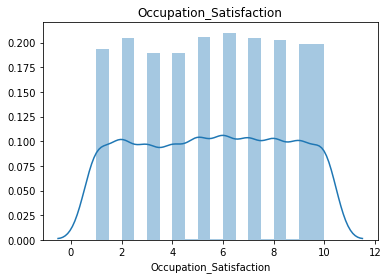

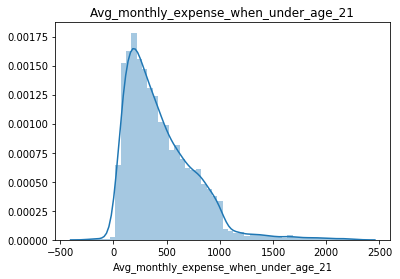

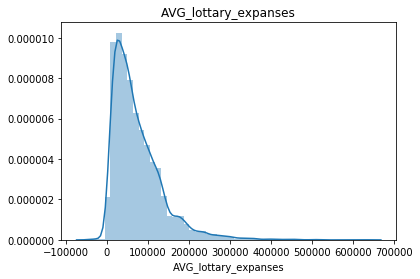

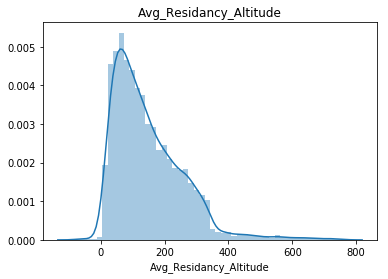

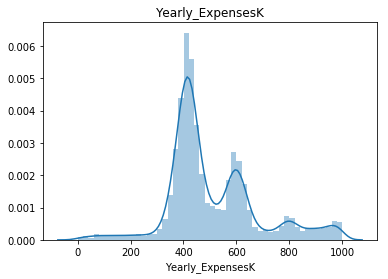

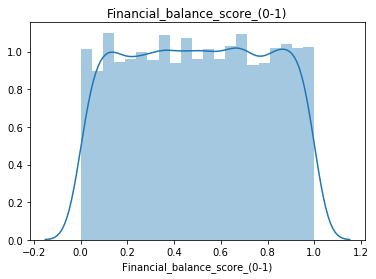

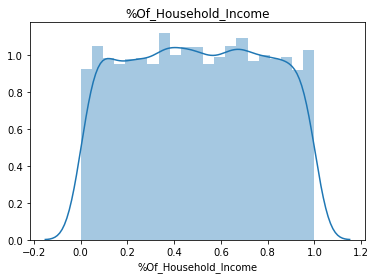

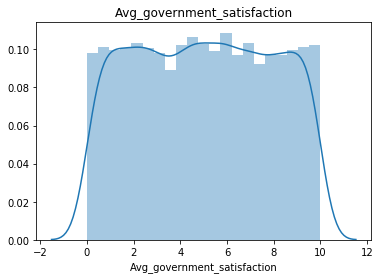

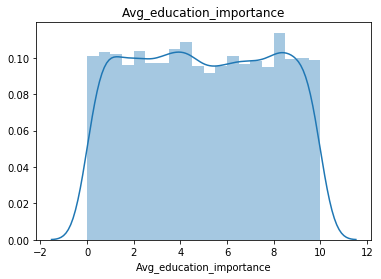

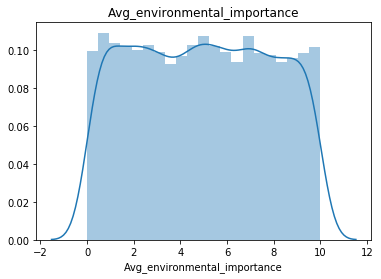

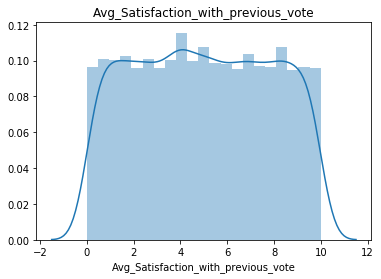

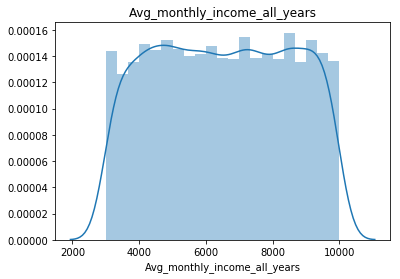

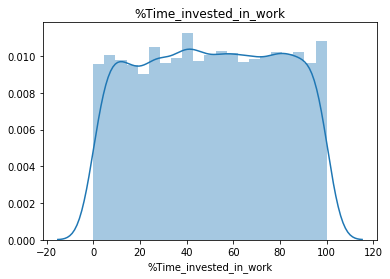

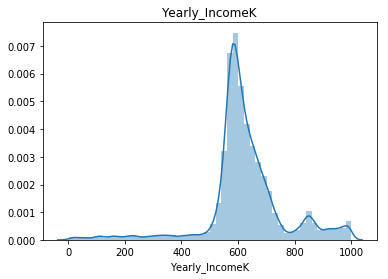

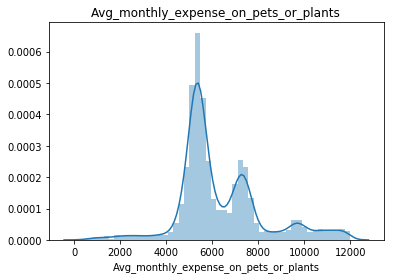

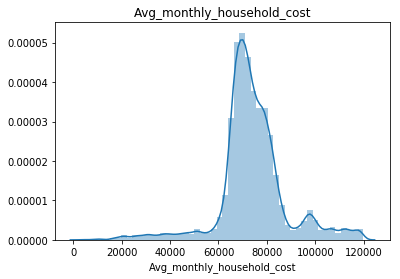

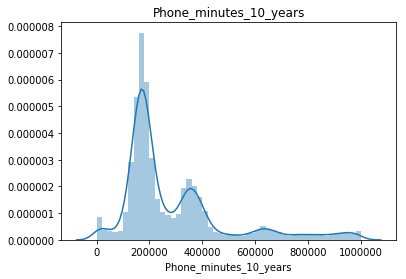

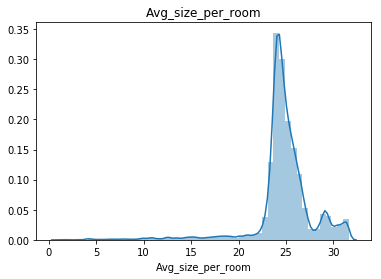

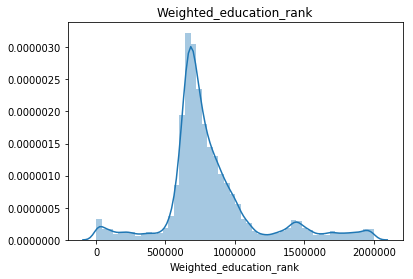

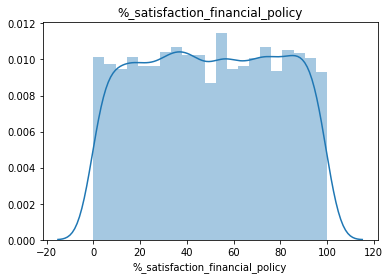

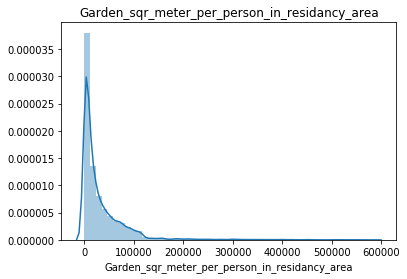

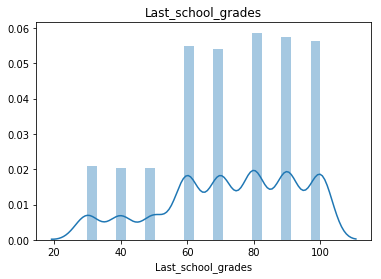

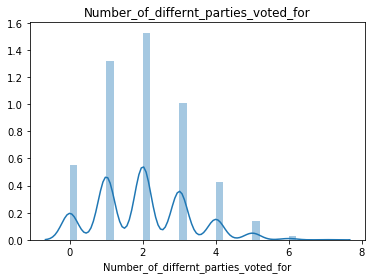

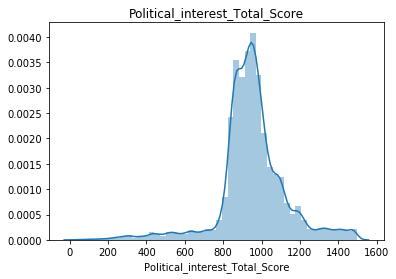

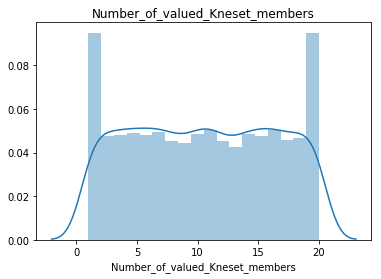

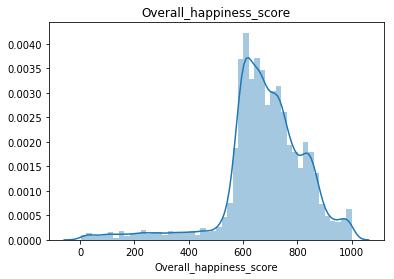

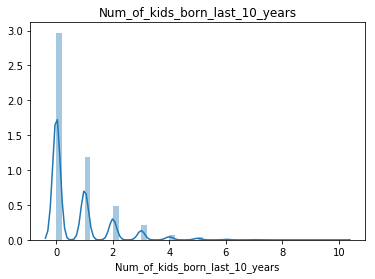

In [8]:
for col in Election_Data_numeric.columns:
    sns.distplot(Election_Data_numeric[col])
    plt.title(col)
    plt.show()

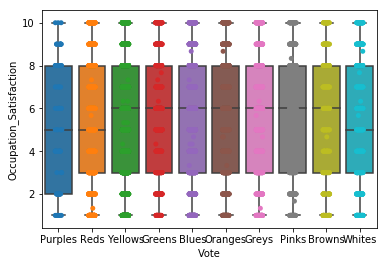

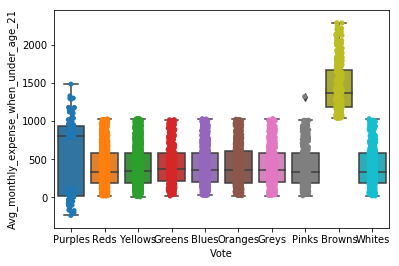

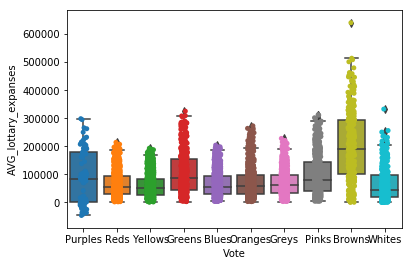

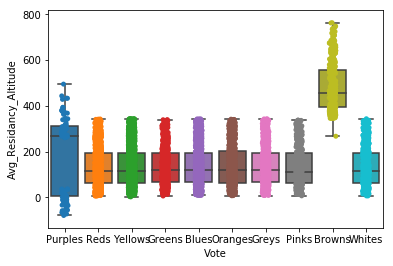

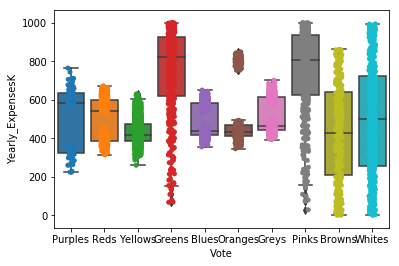

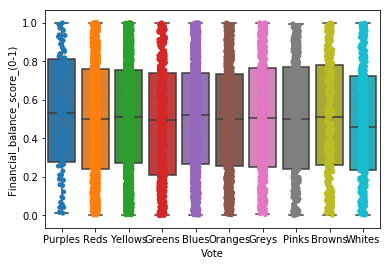

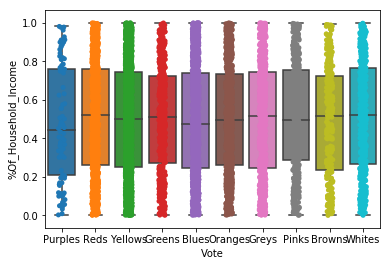

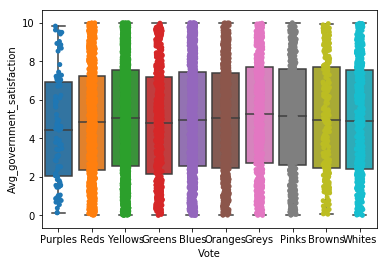

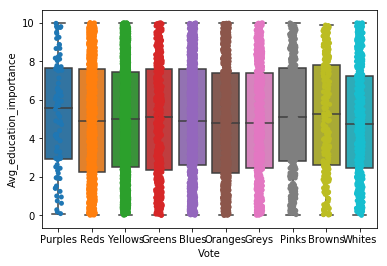

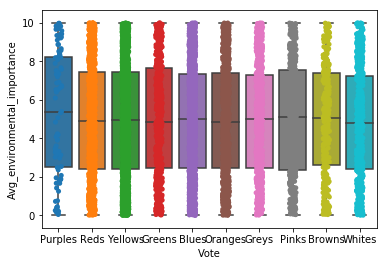

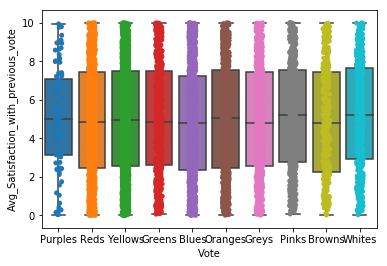

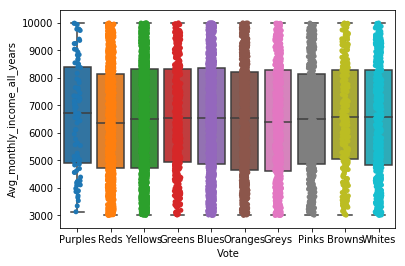

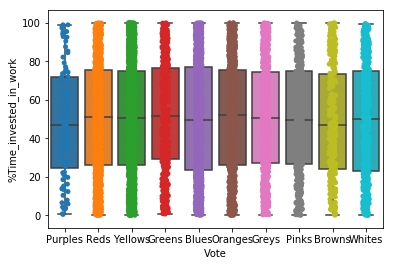

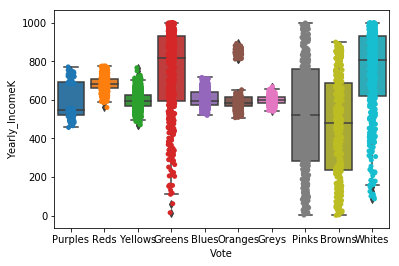

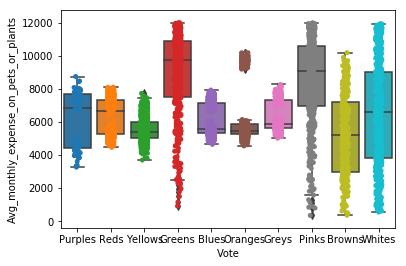

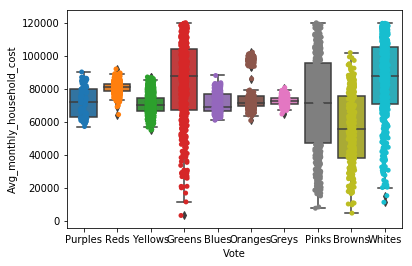

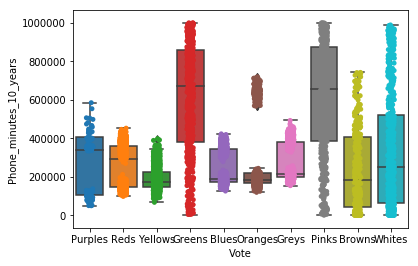

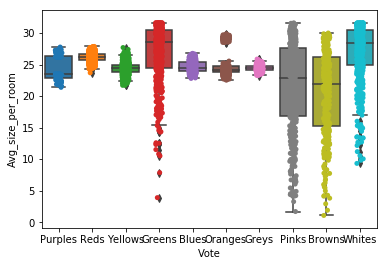

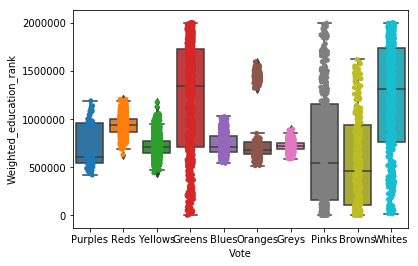

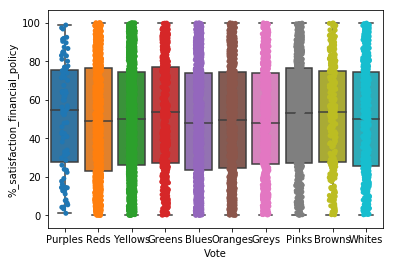

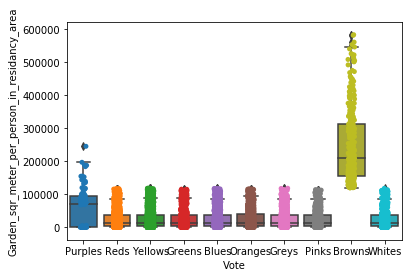

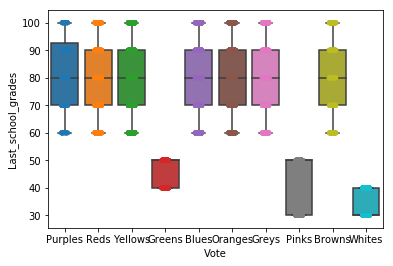

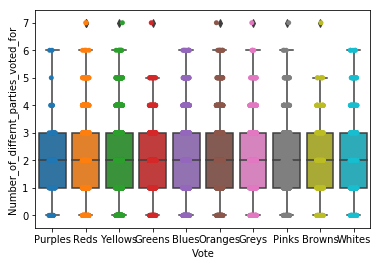

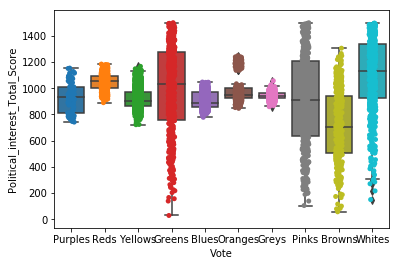

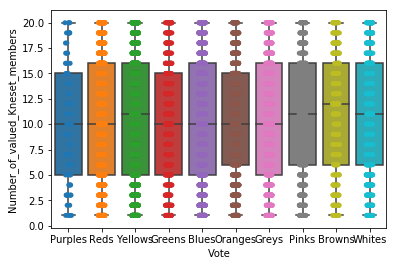

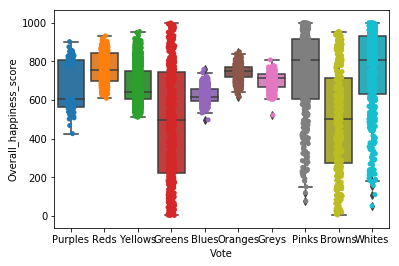

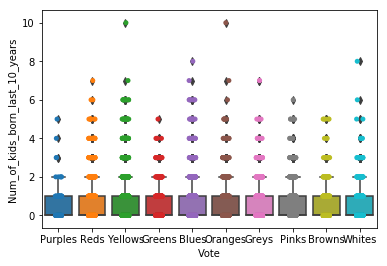

In [9]:
for col in Election_Data_numeric.columns:
    sns.boxplot(x="Vote", y=col, data=Election_Data);
    sns.stripplot(x="Vote", y=col, data=Election_Data);
    plt.show()

##### Correlation between numeric features

In [10]:
from scipy.stats import pearsonr, spearmanr

In [11]:
# pearson
for col in Election_Data_numeric.columns:
    print (col)
    print ("----------------")
    for col2 in Election_Data_numeric:
        if col != col2:
            [r, P] = pearsonr(Election_Data_numeric[col],Election_Data_numeric[col2])
            if r > 0.9:
                print (col2 + " " + str(r) + " " + str(P))
    print ("----------------------------")

Occupation_Satisfaction
----------------
----------------------------
Avg_monthly_expense_when_under_age_21
----------------
Avg_Residancy_Altitude 0.995662328889344 0.0
Garden_sqr_meter_per_person_in_residancy_area 0.9177275973118793 0.0
----------------------------
AVG_lottary_expanses
----------------
----------------------------
Avg_Residancy_Altitude
----------------
Avg_monthly_expense_when_under_age_21 0.995662328889344 0.0
Garden_sqr_meter_per_person_in_residancy_area 0.9173734190829499 0.0
----------------------------
Yearly_ExpensesK
----------------
Avg_monthly_expense_on_pets_or_plants 0.9904093475464184 0.0
Phone_minutes_10_years 0.9741707745781477 0.0
----------------------------
Financial_balance_score_(0-1)
----------------
----------------------------
%Of_Household_Income
----------------
----------------------------
Avg_government_satisfaction
----------------
----------------------------
Avg_education_importance
----------------
----------------------------
Avg_envir

In [12]:
# spearman
for col in Election_Data_numeric.columns:
    print (col)
    print ("----------------")
    for col2 in Election_Data_numeric:
        if col != col2:
            [r, P] = spearmanr(Election_Data_numeric[col],Election_Data_numeric[col2])
            if r > 0.9:
                print (col2 + " " + str(r) + " " + str(P))
    print ("----------------------------")

Occupation_Satisfaction
----------------
----------------------------
Avg_monthly_expense_when_under_age_21
----------------
Avg_Residancy_Altitude 0.9937220859487826 0.0
Garden_sqr_meter_per_person_in_residancy_area 0.9958545558961651 0.0
----------------------------
AVG_lottary_expanses
----------------
----------------------------
Avg_Residancy_Altitude
----------------
Avg_monthly_expense_when_under_age_21 0.9937220859487826 0.0
Garden_sqr_meter_per_person_in_residancy_area 0.9970433165084895 0.0
----------------------------
Yearly_ExpensesK
----------------
Avg_monthly_expense_on_pets_or_plants 0.9849654342338352 0.0
Phone_minutes_10_years 1.0 0.0
----------------------------
Financial_balance_score_(0-1)
----------------
----------------------------
%Of_Household_Income
----------------
----------------------------
Avg_government_satisfaction
----------------
----------------------------
Avg_education_importance
----------------
----------------------------
Avg_environmental_impo

Summary of the result - group of correlation:  
1) Avg_monthly_expense_when_under_age_21 & Avg_Residancy_Altitude & Garden_sqr_meter_per_person_in_residancy_area  
2) Yearly_ExpensesK & Avg_monthly_expense_on_pets_or_plants & Phone_minutes_10_years  
3) Yearly_IncomeK & Avg_monthly_household_cost & Avg_size_per_room & Weighted_education_rank & Political_interest_Total_Score  

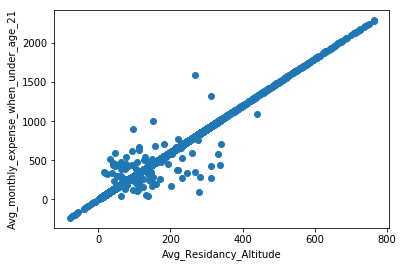

In [13]:
plt.scatter(Election_Data['Avg_Residancy_Altitude'], Election_Data['Avg_monthly_expense_when_under_age_21'])
plt.xlabel('Avg_Residancy_Altitude')
plt.ylabel('Avg_monthly_expense_when_under_age_21')
plt.show()

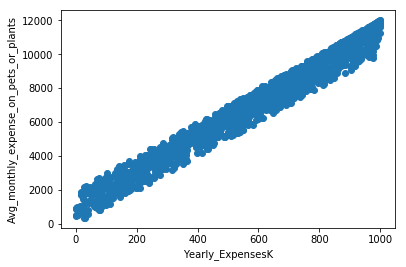

In [14]:
plt.scatter(Election_Data['Yearly_ExpensesK'], Election_Data['Avg_monthly_expense_on_pets_or_plants'])
plt.xlabel('Yearly_ExpensesK')
plt.ylabel('Avg_monthly_expense_on_pets_or_plants')
plt.show()

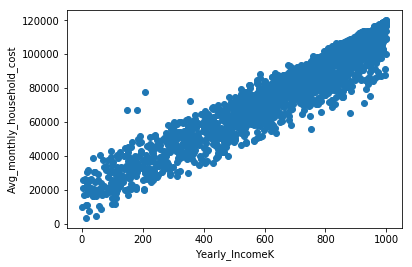

In [15]:
plt.scatter(Election_Data['Yearly_IncomeK'], Election_Data['Avg_monthly_household_cost'])
plt.xlabel('Yearly_IncomeK')
plt.ylabel('Avg_monthly_household_cost')
plt.show()

##### Corrlation to the target

In [16]:
# create int class
Election_Data['VoteInt'] = pd.factorize(Election_Data['Vote'])[0]

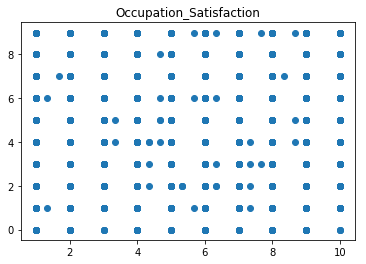

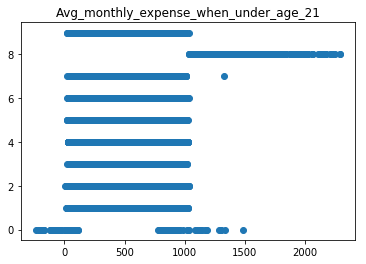

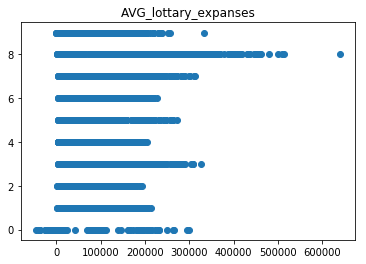

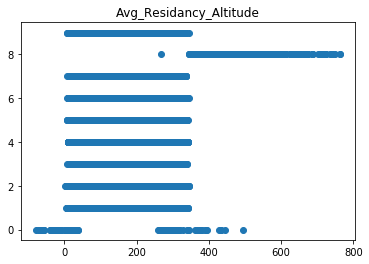

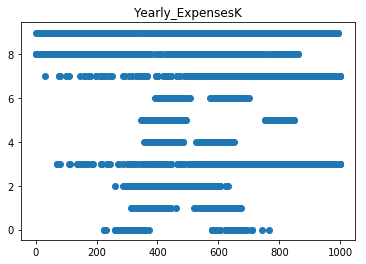

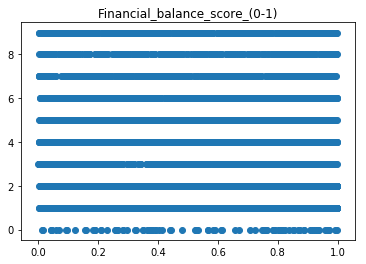

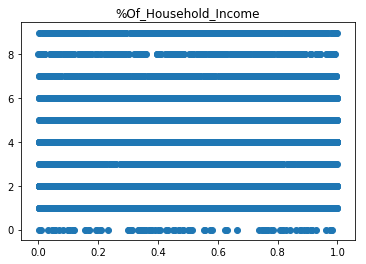

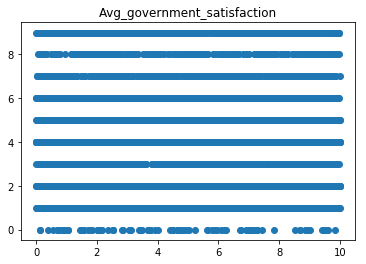

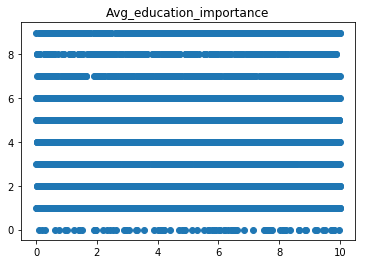

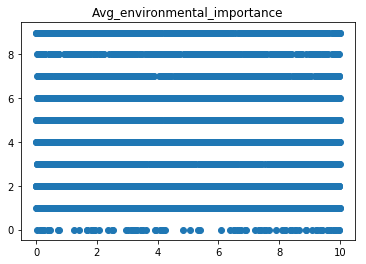

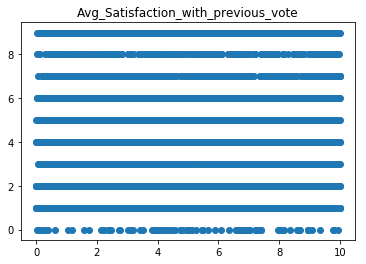

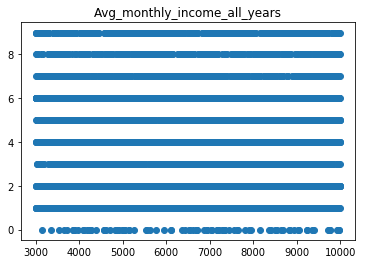

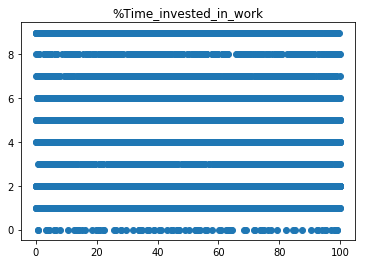

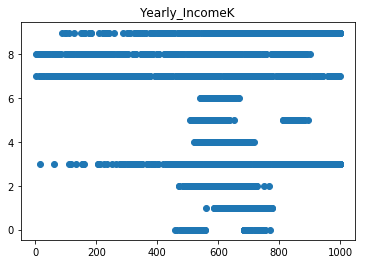

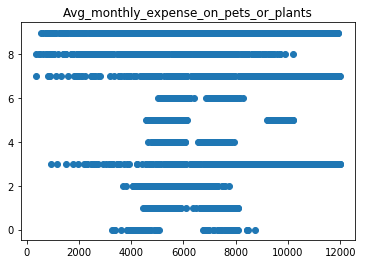

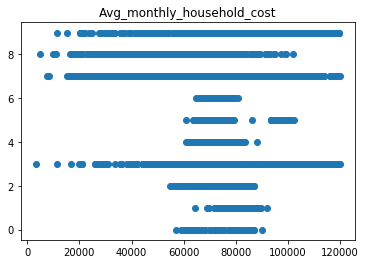

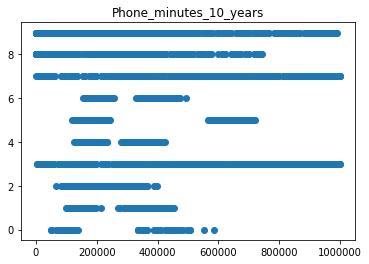

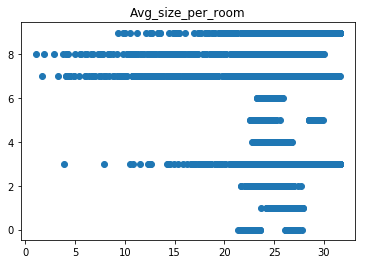

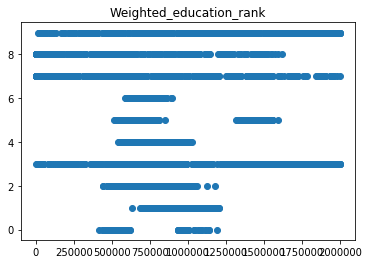

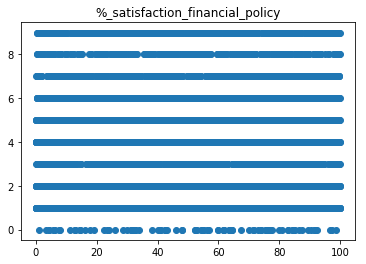

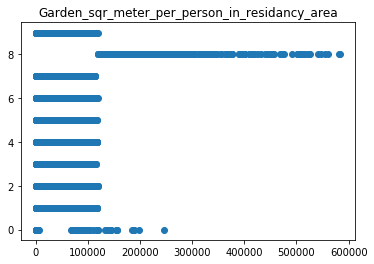

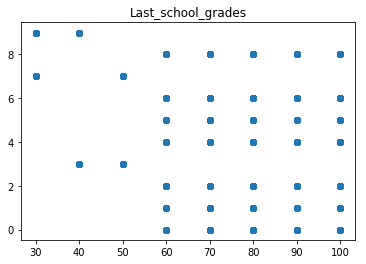

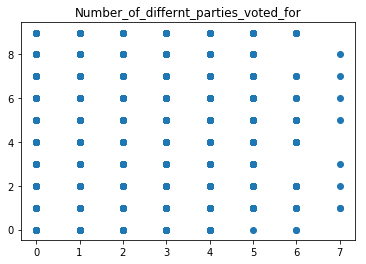

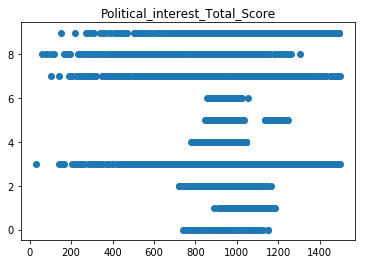

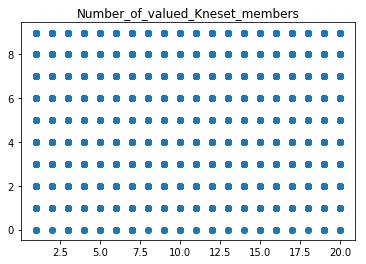

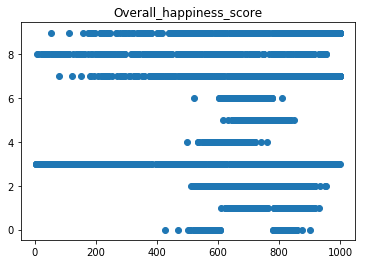

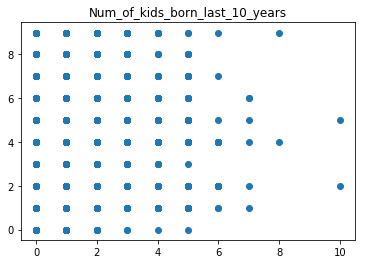

In [17]:
for col in Election_Data_numeric.columns:
    plt.scatter(Election_Data_numeric[col], Election_Data['VoteInt'])
    plt.title(col)
    plt.show()

In [18]:
# Identify which of the orginal features are objects
ObjFeat=Election_Data.keys()[Election_Data.dtypes.map(lambda x: x=='object')]

# Transform the original features to categorical
# Creat new 'int' features, resp.
for f in ObjFeat:
    Election_Data[f] = Election_Data[f].astype("category")
    Election_Data[f+"Int"] = Election_Data[f].cat.rename_categories(range(Election_Data[f].nunique())).astype(int)
#     Election_Data.loc[Election_Data[f].isnull(), f+"Int"] = nu.nan #fix NaN conversion

    # Let's creat a crosstabcross-tabulation to look at this transformation
    # pd.crosstab(train[f+"Int"], train[f], rownames=[f+"Int"], colnames=[f])
        
    

In [19]:
Election_Data = Election_Data.drop(ObjFeat, axis=1)
X = Election_Data.drop(['VoteInt'], axis=1)
y = Election_Data.VoteInt

In [20]:
def pearson(data):
    result = data.copy(deep=True)
    choosen_arr = []
    for col in data:
        for col2 in data:
            if col != col2:
                [r, P] = pearsonr(data[col],data[col2])
                if r > 0.9:
                    if col2 in result.columns.values and col2 not in choosen_arr:
                        result = result.drop(col2, axis=1)
                        print ('dropping: ' + col2)
                        choosen_arr.append(col)
    return result

In [21]:
X_Filttered = pearson(X)

dropping: Avg_Residancy_Altitude
dropping: Garden_sqr_meter_per_person_in_residancy_area
dropping: Avg_monthly_expense_on_pets_or_plants
dropping: Phone_minutes_10_years
dropping: Avg_monthly_household_cost
dropping: Avg_size_per_room
dropping: Weighted_education_rank
dropping: Political_interest_Total_Score


In [22]:
X_Filttered.columns.shape

(29,)

In [23]:
from sklearn import tree

In [24]:
def decision(data, labelColumn, max_depth=None):
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf = clf.fit(data, labelColumn)
    features = data.columns.values
    result = data.copy()
    clf_results = {}
    for i in range(len(clf.feature_importances_)):
        if clf.feature_importances_[i] == 0:
            result = result.drop(features[i], axis=1)
            print ('dropping: ' + features[i])
        clf_results[features[i]] = clf.feature_importances_[i]

    print('------------------------------------')
    clf_results_sort = sorted(clf_results.items(), key=lambda kv: kv[1], reverse=True)
    for key in clf_results_sort:
        print ("%s %s" % (key[0], key[1]))
    return result

In [25]:
Election_Data_New = decision(X_Filttered, y, max_depth=5)

dropping: Occupation_Satisfaction
dropping: Financial_balance_score_(0-1)
dropping: %Of_Household_Income
dropping: Avg_government_satisfaction
dropping: Avg_education_importance
dropping: Avg_environmental_importance
dropping: Avg_Satisfaction_with_previous_vote
dropping: Avg_monthly_income_all_years
dropping: %Time_invested_in_work
dropping: %_satisfaction_financial_policy
dropping: Number_of_differnt_parties_voted_for
dropping: Number_of_valued_Kneset_members
dropping: Num_of_kids_born_last_10_years
dropping: Looking_at_poles_resultsInt
dropping: MarriedInt
dropping: GenderInt
dropping: Voting_TimeInt
dropping: Will_vote_only_large_partyInt
dropping: Age_groupInt
dropping: Main_transportationInt
dropping: OccupationInt
------------------------------------
Yearly_ExpensesK 0.27390634870354597
Overall_happiness_score 0.2238331247362015
Yearly_IncomeK 0.18859086257894137
Last_school_grades 0.1709745419124428
Avg_monthly_expense_when_under_age_21 0.07394474726605983
Most_Important_IssueI

In [26]:
Election_Data_New.shape

(8000, 8)

In [27]:
Election_Data_New.head()

,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Yearly_ExpensesK,Yearly_IncomeK,Last_school_grades,Overall_happiness_score,Most_Important_IssueInt,Financial_agenda_mattersInt
0,1127.401028,250283.44930,666.001121,686.476483,70,794.089210,7,1
1,219.541173,42391.36189,579.272141,650.118971,100,682.720091,0,0
2,813.546282,155037.52910,571.710052,636.167786,80,651.828138,4,0
3,806.718500,106993.79640,397.885246,572.098370,100,635.283771,0,0
4,659.499563,106952.47620,486.516514,477.118587,40,225.093304,3,1


In [28]:
selected_features = Election_Data_New.columns.values

In [29]:
selected_features

array(['Avg_monthly_expense_when_under_age_21', 'AVG_lottary_expanses',
       'Yearly_ExpensesK', 'Yearly_IncomeK', 'Last_school_grades',
       'Overall_happiness_score', 'Most_Important_IssueInt',
       'Financial_agenda_mattersInt'], dtype=object)

We removed 30 features from the original 37 <br>
We have 4 numeric features and 3 categorial features <br>
Numeric: Avg_monthly_expense_when_under_age_21, Yearly_ExpensesK, Yearly_IncomeK, Overall_happiness_score<br>
Categorials: Last_school_grades, Will_vote_only_large_party,Financial_agenda_matters<br>
Now, we will go back to the original data and select only the relevant features<br>
Then, we will preproccess only the selected features

In [30]:
Election_Data = pd.read_csv('ElectionsData.csv')

In [31]:
Election_Data = Election_Data[['Vote', 'Avg_monthly_expense_when_under_age_21', 'Yearly_ExpensesK',
                               'Yearly_IncomeK', 'Overall_happiness_score', 'Last_school_grades', 
                               'Will_vote_only_large_party','Financial_agenda_matters']]

In [32]:
Election_Data.head()

,Vote,Avg_monthly_expense_when_under_age_21,Yearly_ExpensesK,Yearly_IncomeK,Overall_happiness_score,Last_school_grades,Will_vote_only_large_party,Financial_agenda_matters
0,Purples,1127.401028,666.001121,686.476483,794.089210,70,No,Yes
1,Reds,219.541173,579.272141,650.118971,682.720091,100,Yes,No
2,Reds,813.546282,571.710052,636.167786,651.828138,80,Yes,No
3,Yellows,806.718500,397.885246,572.098370,635.283771,100,Yes,No
4,Greens,659.499563,486.516514,477.118587,225.093304,40,Yes,Yes


In [33]:
X = Election_Data.drop('Vote', axis=1)
y = Election_Data['Vote']

In [34]:
X['Will_vote_only_large_party'] = X['Will_vote_only_large_party'].apply(lambda x: 0 if x == 'No' else 1)
X['Financial_agenda_matters'] = X['Financial_agenda_matters'].apply(lambda x: 0 if x == 'No' else 1)

In [35]:
# change last scholl grade to cat for 1-hot-encode
X['Last_school_grades'] = X['Last_school_grades'].apply(str)
X = pd.get_dummies(X)

In [36]:
X.head()

,Avg_monthly_expense_when_under_age_21,Yearly_ExpensesK,Yearly_IncomeK,Overall_happiness_score,Will_vote_only_large_party,Financial_agenda_matters,Last_school_grades_100,Last_school_grades_30,Last_school_grades_40,Last_school_grades_50,Last_school_grades_60,Last_school_grades_70,Last_school_grades_80,Last_school_grades_90
0,1127.401028,666.001121,686.476483,794.089210,0,1,0,0,0,0,0,1,0,0
1,219.541173,579.272141,650.118971,682.720091,1,0,1,0,0,0,0,0,0,0
2,813.546282,571.710052,636.167786,651.828138,1,0,0,0,0,0,0,0,1,0
3,806.718500,397.885246,572.098370,635.283771,1,0,1,0,0,0,0,0,0,0
4,659.499563,486.516514,477.118587,225.093304,1,1,0,0,1,0,0,0,0,0


In [37]:
columns = X.columns

In [38]:
color = ["blue", "brown", "green", "grey", "orange", "pink", "purple", "red", "#fffeb6", "yellow"]
sns.set(style="whitegrid", color_codes=True)
sns.set_palette(color)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=columns)

/Users/marissaposner/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [40]:
X.head()

,Avg_monthly_expense_when_under_age_21,Yearly_ExpensesK,Yearly_IncomeK,Overall_happiness_score,Will_vote_only_large_party,Financial_agenda_matters,Last_school_grades_100,Last_school_grades_30,Last_school_grades_40,Last_school_grades_50,Last_school_grades_60,Last_school_grades_70,Last_school_grades_80,Last_school_grades_90
0,0.539723,0.665884,0.686117,0.793438,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.180520,0.579125,0.649718,0.681717,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.415543,0.571560,0.635750,0.650727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.412842,0.397675,0.571607,0.634130,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.354593,0.486337,0.476519,0.222642,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
print(y[X['Will_vote_only_large_party'] == 0].unique())
print(y[X['Will_vote_only_large_party'] == 1].unique())

['Purples' 'Browns']
['Reds' 'Yellows' 'Greens' 'Blues' 'Oranges' 'Greys' 'Pinks' 'Whites']


In [42]:
print(y[X['Financial_agenda_matters'] == 0].unique())
print(y[X['Financial_agenda_matters'] == 1].unique())

['Reds' 'Yellows' 'Blues' 'Oranges' 'Greys' 'Browns']
['Purples' 'Greens' 'Pinks' 'Whites']


In [43]:
print(y[(X['Financial_agenda_matters'] == 0) & (X['Will_vote_only_large_party'] == 0)].unique())
print(y[(X['Financial_agenda_matters'] == 1) & (X['Will_vote_only_large_party'] == 0)].unique())

['Browns']
['Purples']


In [44]:
print(y[X['Last_school_grades_30'] == 1].unique())
print(y[X['Last_school_grades_40'] == 1].unique())
print(y[X['Last_school_grades_50'] == 1].unique())
print(y[X['Last_school_grades_60'] == 1].unique())
print(y[X['Last_school_grades_70'] == 1].unique())
print(y[X['Last_school_grades_80'] == 1].unique())
print(y[X['Last_school_grades_90'] == 1].unique())
print(y[X['Last_school_grades_100'] == 1].unique())

['Whites' 'Pinks']
['Greens' 'Whites']
['Pinks' 'Greens']
['Blues' 'Greys' 'Reds' 'Yellows' 'Browns' 'Oranges' 'Purples']
['Purples' 'Reds' 'Yellows' 'Oranges' 'Blues' 'Greys' 'Browns']
['Reds' 'Yellows' 'Oranges' 'Greys' 'Blues' 'Browns' 'Purples']
['Yellows' 'Reds' 'Oranges' 'Blues' 'Greys' 'Purples' 'Browns']
['Reds' 'Yellows' 'Blues' 'Oranges' 'Browns' 'Greys' 'Purples']


In [45]:
W_P_y = pd.concat([X[y.isin(['Whites', 'Pinks'])], y[y.isin(['Whites', 'Pinks'])]], axis=1)
W_P_y.shape

(954, 15)

In [46]:
W_P_y.head()

,Avg_monthly_expense_when_under_age_21,Yearly_ExpensesK,Yearly_IncomeK,Overall_happiness_score,Will_vote_only_large_party,Financial_agenda_matters,Last_school_grades_100,Last_school_grades_30,Last_school_grades_40,Last_school_grades_50,Last_school_grades_60,Last_school_grades_70,Last_school_grades_80,Last_school_grades_90,Vote
20,0.187656,0.946987,0.892668,0.993467,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Pinks
22,0.494727,0.707454,0.667348,0.708441,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Pinks
49,0.293747,0.702552,0.793094,0.957386,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Whites
66,0.132567,0.681362,0.360264,0.841932,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Pinks
69,0.313307,0.927641,0.942903,0.953633,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Whites


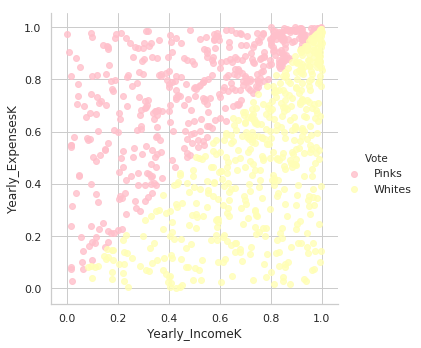

In [47]:
sns.lmplot(x="Yearly_IncomeK", y="Yearly_ExpensesK", hue="Vote", data=W_P_y, fit_reg=False, 
           palette=[color[5], color[8]])
plt.show()

In [48]:
P_G_y = pd.concat([X[y.isin(['Pinks', 'Greens'])], y[y.isin(['Pinks', 'Greens'])]], axis=1)
P_G_y.shape

(933, 15)

In [49]:
P_G_y.head()

,Avg_monthly_expense_when_under_age_21,Yearly_ExpensesK,Yearly_IncomeK,Overall_happiness_score,Will_vote_only_large_party,Financial_agenda_matters,Last_school_grades_100,Last_school_grades_30,Last_school_grades_40,Last_school_grades_50,Last_school_grades_60,Last_school_grades_70,Last_school_grades_80,Last_school_grades_90,Vote
4,0.354593,0.486337,0.476519,0.222642,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Greens
20,0.187656,0.946987,0.892668,0.993467,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Pinks
22,0.494727,0.707454,0.667348,0.708441,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Pinks
63,0.161035,0.740824,0.944308,0.650060,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Greens
66,0.132567,0.681362,0.360264,0.841932,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Pinks


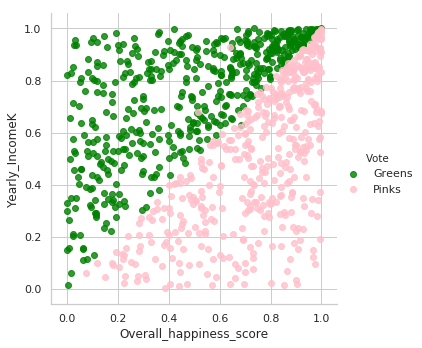

In [50]:
sns.lmplot(x="Overall_happiness_score", y="Yearly_IncomeK", hue="Vote", data=P_G_y, fit_reg=False, 
           palette=[color[2], color[5]])
plt.show()

In [51]:
G_W_y = pd.concat([X[y.isin(['Greens', 'Whites'])], y[y.isin(['Greens', 'Whites'])]], axis=1)
G_W_y.shape

(997, 15)

In [52]:
G_W_y.head()

,Avg_monthly_expense_when_under_age_21,Yearly_ExpensesK,Yearly_IncomeK,Overall_happiness_score,Will_vote_only_large_party,Financial_agenda_matters,Last_school_grades_100,Last_school_grades_30,Last_school_grades_40,Last_school_grades_50,Last_school_grades_60,Last_school_grades_70,Last_school_grades_80,Last_school_grades_90,Vote
4,0.354593,0.486337,0.476519,0.222642,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Greens
49,0.293747,0.702552,0.793094,0.957386,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Whites
63,0.161035,0.740824,0.944308,0.650060,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Greens
69,0.313307,0.927641,0.942903,0.953633,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Whites
70,0.124868,0.353219,0.951882,0.878473,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Whites


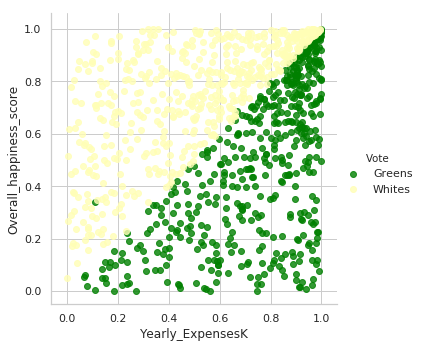

In [53]:
sns.lmplot(x="Yearly_ExpensesK", y="Overall_happiness_score", hue="Vote", data=G_W_y, fit_reg=False, 
           palette=[color[2], color[8]])
plt.show()

We can now predict almost with 100% accuracy 5 out of 10 of the parties 
(`Greens`, `Whites`, `Pinks`, `Browns`, `Purples`)

Now, let's look at the numeric feature with respect to the other 5 parties 

In [54]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [55]:
def Vote_to_VoteInt(argument):
    switcher = {
        'Blues': 0,
        'Browns': 1,
        'Greens': 2,
        'Greys': 3,
        'Oranges': 4,
        'Pinks': 5,
        'Purples': 6,
        'Reds': 7,
        'Whites': 8,
        'Yellows': 9
    }
    return switcher.get(argument, "nothing")

def VoteInt_to_Vote(argument):
    switcher = {
        0: 'Blues',
        1: 'Browns',
        2: 'Greens',
        3: 'Greys',
        4: 'Oranges',
        5: 'Pinks',
        6: 'Purples',
        7: 'Reds',
        8: 'Whites',
        9: 'Yellows'
    }
    return switcher.get(argument, "nothing")

In [56]:
yInt = y.apply(lambda x: Vote_to_VoteInt(x))
y_cluster = yInt[y.isin(['Blues', 'Greys', 'Oranges', 'Reds', 'Yellows'])]
X_cluster = X[['Yearly_ExpensesK', 'Overall_happiness_score', 'Yearly_IncomeK']]\
              [y.isin(['Blues', 'Greys', 'Oranges', 'Reds', 'Yellows'])]

In [57]:
clfKMeans = KMeans(n_clusters=5)
clfKMeans.fit(X_cluster, y_cluster)
Cluster_Fit = pd.DataFrame(clfKMeans.labels_)
Cluster_Fit = Cluster_Fit.rename(columns = {0:'Cluster_Predict'})
y_label = y_cluster.values
y_label_str = []
for i in range(len(y_label)):
    y_label_str.append(VoteInt_to_Vote(y_label[i]))
df_cluster = pd.concat([Cluster_Fit,pd.DataFrame(y_label_str)], axis=1)
df_cluster = df_cluster.rename(columns = {0:'Vote'})
df_cluster.index = X_cluster.index
Data_With_Cluster = pd.concat([X_cluster[['Yearly_ExpensesK', 'Overall_happiness_score', 'Yearly_IncomeK']],
                               df_cluster], axis=1)
# Cluster_Predict = clfKMeans.predict(X_test_cluster_new)

In [58]:
for label in ['Blues','Greys','Oranges','Reds','Yellows']:
    print (label + ':')
    print ('----------')
    for cluster in range(len(clfKMeans.cluster_centers_)):
        print ('cluster_' + str(cluster) + ':')
        print (Data_With_Cluster.Vote[(Data_With_Cluster.Cluster_Predict == cluster) & \
                               (Data_With_Cluster.Vote == label)].count())

Blues:
----------
cluster_0:
2
cluster_1:
831
cluster_2:
531
cluster_3:
0
cluster_4:
0
Greys:
----------
cluster_0:
469
cluster_1:
7
cluster_2:
252
cluster_3:
0
cluster_4:
0
Oranges:
----------
cluster_0:
658
cluster_1:
11
cluster_2:
0
cluster_3:
0
cluster_4:
195
Reds:
----------
cluster_0:
0
cluster_1:
0
cluster_2:
535
cluster_3:
528
cluster_4:
0
Yellows:
----------
cluster_0:
548
cluster_1:
1449
cluster_2:
84
cluster_3:
71
cluster_4:
0


In [59]:
Color_Sub = ["blue", "grey", "orange", "red", "yellow"]
Labels_Sub = ['Blues','Greys','Oranges','Reds','Yellows']

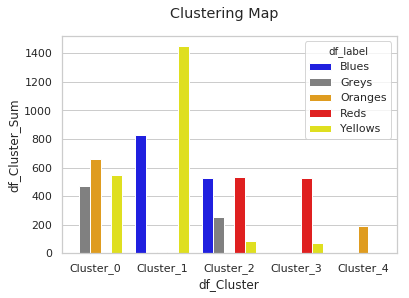

[[0.45519356 0.76142573 0.59250293]
 [0.40518916 0.60857161 0.58353419]
 [0.60105005 0.67955887 0.64436412]
 [0.39799372 0.84744289 0.70214393]
 [0.79947264 0.69362502 0.85004789]]


In [60]:
d = {'df_label': ['Blues','Blues','Blues','Blues','Blues',
                  'Greys','Greys','Greys','Greys','Greys',
                  'Oranges','Oranges','Oranges','Oranges','Oranges',
                  'Reds','Reds','Reds','Reds','Reds',
                  'Yellows','Yellows','Yellows','Yellows','Yellows'],
     'df_Cluster': ['Cluster_0','Cluster_1','Cluster_2','Cluster_3','Cluster_4',
                    'Cluster_0','Cluster_1','Cluster_2','Cluster_3','Cluster_4',
                    'Cluster_0','Cluster_1','Cluster_2','Cluster_3','Cluster_4',
                    'Cluster_0','Cluster_1','Cluster_2','Cluster_3','Cluster_4',
                    'Cluster_0','Cluster_1','Cluster_2','Cluster_3','Cluster_4'],
    'df_Cluster_Sum': []}

for label in Labels_Sub:
    for cluster in range(len(clfKMeans.cluster_centers_)):
        d['df_Cluster_Sum'].append(df_cluster['Cluster_Predict']\
         [(df_cluster['Cluster_Predict']==cluster)&(df_cluster.Vote==label)].count())

df = pd.DataFrame(d)
sns.set(style="whitegrid", color_codes=True)
sns.set_palette(Color_Sub)
sns.barplot(x='df_Cluster', y='df_Cluster_Sum', hue='df_label', data=df)
plt.gcf().suptitle('Clustering Map')
plt.show()
print (clfKMeans.cluster_centers_)

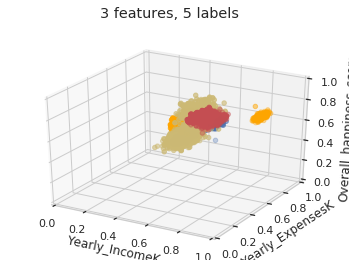

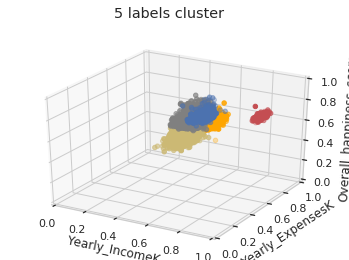

In [61]:
from mpl_toolkits.mplot3d import Axes3D

# 3D ns_Yearly_IncomeK vs ns_Yearly_ExpensesK vs ns_Overall_happiness_score
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, Color_str in [('grey', 'Greys'), ('y', 'Yellows'),  ('orange', 'Oranges'), 
                     ('b', 'Blues'), ('r', 'Reds'), ]:
    xs = Data_With_Cluster.Yearly_IncomeK[(Data_With_Cluster.Vote == Color_str)]
    ys = Data_With_Cluster.Yearly_ExpensesK[(Data_With_Cluster.Vote == Color_str)]
    zs = Data_With_Cluster.Overall_happiness_score[(Data_With_Cluster.Vote == Color_str)]
    ax.scatter(xs, ys, zs, c=c)

ax.set_xlabel('Yearly_IncomeK')
ax.set_ylabel('Yearly_ExpensesK')
ax.set_zlabel('Overall_happiness_score')
ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,1)
plt.gcf().suptitle('3 features, 5 labels')

plt.show()

# 3D clustering
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, cluster in [('grey', 0), ('y', 1),  ('orange', 2), ('b', 3), ('r', 4)]:
    xs = Data_With_Cluster.Yearly_IncomeK[(Data_With_Cluster.Cluster_Predict == cluster)]
    ys = Data_With_Cluster.Yearly_ExpensesK[(Data_With_Cluster.Cluster_Predict == cluster)]
    zs = Data_With_Cluster.Overall_happiness_score[(Data_With_Cluster.Cluster_Predict == cluster)]
    ax.scatter(xs, ys, zs, c=c)

ax.set_xlabel('Yearly_IncomeK')
ax.set_ylabel('Yearly_ExpensesK')
ax.set_zlabel('Overall_happiness_score')
ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,1)
plt.gcf().suptitle('5 labels cluster')

plt.show()

Now we'll fit model for each cluster <br>
In order to do that we will split the data to train and test

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size = 0.2, random_state=42)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4936, 3), (1235, 3), (4936,), (1235,))

In [65]:
clfKMeans = KMeans(n_clusters=5)
clfKMeans.fit(X_train, y_train)
Cluster_Fit = pd.DataFrame(clfKMeans.labels_)
Cluster_Fit = Cluster_Fit.rename(columns = {0:'Cluster_Predict'})
y_label = y_train.values
y_label_str = []
for i in range(len(y_label)):
    y_label_str.append(VoteInt_to_Vote(y_label[i]))
df_cluster = pd.concat([Cluster_Fit,pd.DataFrame(y_label_str)], axis=1)
df_cluster = df_cluster.rename(columns = {0:'Vote'})
df_cluster.index = X_train.index
Data_With_Cluster = pd.concat([X_train[['Yearly_ExpensesK', 'Overall_happiness_score', 'Yearly_IncomeK']],
                               df_cluster], axis=1)
Data_With_Cluster['VoteInt'] = y_train.values
Cluster_Predict = clfKMeans.predict(X_test)
X_cluster_test = pd.DataFrame(Cluster_Predict)
X_cluster_test = X_cluster_test.rename(columns = {0:'Cluster_Predict'})
X_cluster_test.index = X_test.index
Data_With_Cluster_test = pd.concat([X_test[['Yearly_ExpensesK', 'Overall_happiness_score', 'Yearly_IncomeK']],
                               X_cluster_test], axis=1)

In [66]:
Data_With_Cluster.head()

,Yearly_ExpensesK,Overall_happiness_score,Yearly_IncomeK,Cluster_Predict,Vote,VoteInt
5934,0.406060,0.577065,0.572048,1,Blues,0
6699,0.641020,0.753018,0.652105,4,Reds,7
5542,0.532934,0.864741,0.614820,2,Yellows,9
1271,0.383993,0.582601,0.544159,1,Blues,0
6711,0.426329,0.593200,0.590457,1,Blues,0


In [67]:
Data_With_Cluster_test.head()

,Yearly_ExpensesK,Overall_happiness_score,Yearly_IncomeK,Cluster_Predict
2982,0.399104,0.595557,0.601639,1
2396,0.392492,0.773153,0.591467,2
4311,0.557892,0.721029,0.634510,4
446,0.446582,0.773349,0.581492,2
2246,0.597672,0.674111,0.699943,4


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [69]:
def GridSearch_table_plot(clf, param_grid, X, y, cv=10):

    
    grid_clf = GridSearchCV(estimator  = clf, 
                        param_grid = param_grid, 
                        cv         = cv)

    _ = grid_clf.fit(X, y)

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_




    return clf_params

In [70]:
###This section can take several minutes

classifier_arr = []
Election_Data_Test_predict_Blues_Greys_Oranges_Reds_Yellows_combine = pd.DataFrame()
for cluster in range(len(clfKMeans.cluster_centers_)):
    X_tr = Data_With_Cluster[['Yearly_ExpensesK', 'Overall_happiness_score', 'Yearly_IncomeK']]
    y_tr = Data_With_Cluster['VoteInt']
    X_te = Data_With_Cluster_test[['Yearly_ExpensesK', 'Overall_happiness_score', 'Yearly_IncomeK']]
    print ('Cluster No. ' + str(cluster) + ':')
    print ('--------------')
    Cluster_unique_lables = pd.unique(Data_With_Cluster['Vote'][Data_With_Cluster.Cluster_Predict == cluster])
    # set of parameters to test
    param_grid_DT = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 11],
              "max_depth": [None, 5, 9, 10, 11],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }
    
    param_grid_SVC = {"kernel": ["rbf", "sigmoid", "linear", "poly"],
                      "degree": [2, 3, 4, 5],
              }
    
    param_grid_RF_ET = {"criterion": ["gini", "entropy"],
                        "max_depth": [None, 5, 10],
                        "max_leaf_nodes": [None, 10, 20],
                        "max_features": ['auto', None],
                        "n_estimators": [50],
              }
    
    param_grid_LDA = {"solver": ['svd', 'lsqr'],
              }
        
    #Find best parameters for each cluster via gridsearch
    clfRF = RandomForestClassifier()
    clfDT = DecisionTreeClassifier()
    clfNB = GaussianNB()
    clfLDA = LDA()

    ts_gs_DT = GridSearch_table_plot(clfDT, param_grid_DT, 
                                     X_tr[Data_With_Cluster.Cluster_Predict == cluster], 
                                     y_tr[Data_With_Cluster.Cluster_Predict == cluster], cv=10)

    ts_gs_RF = GridSearch_table_plot(clfRF, param_grid_RF_ET, 
                                     X_tr[Data_With_Cluster.Cluster_Predict == cluster], 
                                     y_tr[Data_With_Cluster.Cluster_Predict == cluster], cv=10)
    if (len(Cluster_unique_lables) > 1):
        ts_gs_LDA = GridSearch_table_plot(clfLDA, param_grid_LDA, 
                                     X_tr[Data_With_Cluster.Cluster_Predict == cluster], 
                                     y_tr[Data_With_Cluster.Cluster_Predict == cluster], cv=10)
        clfLDA = LDA(**ts_gs_LDA)
        clfLDA.fit(X_tr[Data_With_Cluster.Cluster_Predict == cluster], 
                   y_tr[Data_With_Cluster.Cluster_Predict == cluster])
        y_test_predictLDA = \
        clfLDA.predict(X_te[Data_With_Cluster_test.Cluster_Predict == cluster])
        errorLDA = (y_test[Data_With_Cluster_test.Cluster_Predict == cluster] != y_test_predictLDA).sum()
        
    
    #Init classifier params
    clfDT = DecisionTreeClassifier(**ts_gs_DT)
    clfRF = RandomForestClassifier(**ts_gs_RF)
        
    #Fit each model
    clfRF.fit(X_tr[Data_With_Cluster.Cluster_Predict == cluster], 
                   y_tr[Data_With_Cluster.Cluster_Predict == cluster])
    clfDT.fit(X_tr[Data_With_Cluster.Cluster_Predict == cluster], 
                   y_tr[Data_With_Cluster.Cluster_Predict == cluster])    
    clfNB.fit(X_tr[Data_With_Cluster.Cluster_Predict == cluster], 
                   y_tr[Data_With_Cluster.Cluster_Predict == cluster])
    
    #Predict each model on the test
    y_test_predictRF = clfRF.predict(X_te[Data_With_Cluster_test.Cluster_Predict == cluster])
    y_test_predictDT = clfDT.predict(X_te[Data_With_Cluster_test.Cluster_Predict == cluster])
    y_test_predictNB = clfNB.predict(X_te[Data_With_Cluster_test.Cluster_Predict == cluster])
    
    #calculate error for each model
    errorRF = (y_test[Data_With_Cluster_test.Cluster_Predict == cluster] != y_test_predictRF).sum()
    errorDT = (y_test[Data_With_Cluster_test.Cluster_Predict == cluster] != y_test_predictDT).sum()
    errorNB = (y_test[Data_With_Cluster_test.Cluster_Predict == cluster] != y_test_predictNB).sum()
    
    if (len(Cluster_unique_lables) > 1):
        error_arr = [errorRF, errorDT, errorNB, errorLDA]
        clf_arr = [clfRF, clfDT, clfNB, clfLDA]
        y_test_predict_arr = [y_test_predictRF, y_test_predictDT, y_test_predictNB, y_test_predictLDA]
    else:
        error_arr = [errorRF, errorDT, errorNB]
        clf_arr = [clfRF, clfDT, clfNB]
        y_test_predict_arr = [y_test_predictRF, y_test_predictDT, y_test_predictNB]
    
    min_ix = error_arr.index(min(error_arr))
    classifier_arr.append(clf_arr[min_ix])
    y_test_predict = y_test_predict_arr[min_ix]
    print ("For cluster No. " + str(cluster) + " the model is " + str(type(clf_arr[min_ix]).__name__))
    print (error_arr)
                 
        
    #Printing test error
    print("Cluster " + str(cluster) + ": number of mislabeled points out of a total %d points : %d"% \
        (len(y_test[Data_With_Cluster_test.Cluster_Predict == cluster]),\
        (y_test[Data_With_Cluster_test.Cluster_Predict == cluster] != y_test_predict).sum()))
    
    #Create result Data Frame
    y_test_label = []
    for i in range(len(y_test_predict)):
        y_test_label.append(VoteInt_to_Vote(str(y_test_predict[i])))
    Election_Data_Test_predict_Blues_Greys_Oranges_Reds_Yellows_combine_tmp = pd.DataFrame()
    Election_Data_Test_predict_Blues_Greys_Oranges_Reds_Yellows_combine_tmp = \
    pd.DataFrame(y_test_label).rename(columns = {0:'PredictVote'})
    Election_Data_Test_predict_Blues_Greys_Oranges_Reds_Yellows_combine_tmp.index = \
    y_test[Data_With_Cluster_test.Cluster_Predict == cluster].index 
    frames = [Election_Data_Test_predict_Blues_Greys_Oranges_Reds_Yellows_combine, \
              Election_Data_Test_predict_Blues_Greys_Oranges_Reds_Yellows_combine_tmp]
    Election_Data_Test_predict_Blues_Greys_Oranges_Reds_Yellows_combine = pd.concat(frames)
    
    print ()
    
Election_Data_Test_predict_Blues_Greys_Oranges_Reds_Yellows_combine = \
Election_Data_Test_predict_Blues_Greys_Oranges_Reds_Yellows_combine.sort_index(axis=0)

Cluster No. 0:
--------------
For cluster No. 0 the model is RandomForestClassifier
[2, 2, 2, 2]
Cluster 0: number of mislabeled points out of a total 108 points : 2

Cluster No. 1:
--------------


/Users/marissaposner/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/marissaposner/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/marissaposner/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


For cluster No. 1 the model is RandomForestClassifier
[68, 76, 87, 124]
Cluster 1: number of mislabeled points out of a total 449 points : 68

Cluster No. 2:
--------------


/Users/marissaposner/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/marissaposner/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/marissaposner/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/marissaposner/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py

For cluster No. 2 the model is RandomForestClassifier
[37, 55, 39, 54]
Cluster 2: number of mislabeled points out of a total 333 points : 37

Cluster No. 3:
--------------
For cluster No. 3 the model is RandomForestClassifier
[0, 0, 0]
Cluster 3: number of mislabeled points out of a total 39 points : 0

Cluster No. 4:
--------------


/Users/marissaposner/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


For cluster No. 4 the model is LinearDiscriminantAnalysis
[52, 58, 63, 46]
Cluster 4: number of mislabeled points out of a total 306 points : 46

